In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

## Importing the Data

In [2]:
# importing dataset
df = pd.read_csv('Scrapper/final.csv', header=None)
df.rename(columns={0: 'comment', 1: 'category'}, inplace=True)

## Exploring the Data

In [3]:
df.head()

,comment,category
0,Love you sir!!,positive
1,Please make videos on..Midpoint circle drawing...,suggestion
2,I bought both of your courses on Udemy. You ar...,question
3,"Thank you very much, u really got me in the fi...",positive
4,i hope u are ok with everything going on again...,other


In [4]:
# dimension of the dataset
df.shape

(1206, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comment   1206 non-null   object
 1   category  1206 non-null   object
dtypes: object(2)
memory usage: 19.0+ KB


In [6]:
df.describe()

,comment,category
count,1206,1206
unique,1185,6
top,SIR WILL YOU PLEASE MAKE A DETAIL VIDEO ON EXP...,positive
freq,4,571


In [7]:
# unique categories
df['category'].unique()

array(['positive', 'suggestion', 'question', 'other', 'correction',
       'negative'], dtype=object)

In [8]:
lens = df.comment.str.len()
lens.mean(), lens.std(), lens.max()

(81.14842454394693, 93.15150035433012, 1461)

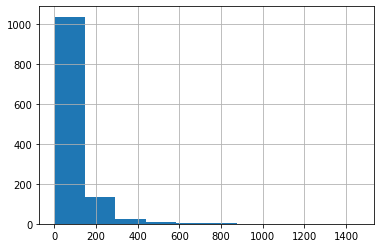

In [9]:
lens.hist();

## Preprocessing

In [10]:
# lowercasing
df['comment'] = df['comment'].str.lower()
df['comment']

0                                          love you sir!!
1       please make videos on..midpoint circle drawing...
2       i bought both of your courses on udemy. you ar...
3       thank you very much, u really got me in the fi...
4       i hope u are ok with everything going on again...
                              ...                        
1201         what is the purpose of writing main function
1202                    your teaching skill is awesome 👍👌
1203    we can use online compiler to run a program..t...
1204    c programs can be compiled in browser and that...
1205    sir i am about to persue cs engineering. will ...
Name: comment, Length: 1206, dtype: object

In [11]:
# checking for NaN values
df.isnull().sum()

comment     0
category    0
dtype: int64

There is no **NaN** value in the dataset.

In [12]:
# checking for duplicate 
df.duplicated().any()

True

Duplicate row is present. Let's remove the duplicate rows.

In [13]:
# removing duplicate rows
df = df.drop_duplicates()
df.duplicated().any()

False

Duplicated removed succefully.

In [14]:
# removing URLs
df['comment'] = df['comment'].str.replace('http\S+|www.\S+', '', case=False)
df

,comment,category
0,love you sir!!,positive
1,please make videos on..midpoint circle drawing...,suggestion
2,i bought both of your courses on udemy. you ar...,question
3,"thank you very much, u really got me in the fi...",positive
4,i hope u are ok with everything going on again...,other
...,...,...
1201,what is the purpose of writing main function,question
1202,your teaching skill is awesome 👍👌,positive
1203,we can use online compiler to run a program..t...,question
1204,c programs can be compiled in browser and that...,question


In [15]:
# removing commas "\n"
df['comment'] = df['comment'].replace('\n','', regex=True)
df

,comment,category
0,love you sir!!,positive
1,please make videos on..midpoint circle drawing...,suggestion
2,i bought both of your courses on udemy. you ar...,question
3,"thank you very much, u really got me in the fi...",positive
4,i hope u are ok with everything going on again...,other
...,...,...
1201,what is the purpose of writing main function,question
1202,your teaching skill is awesome 👍👌,positive
1203,we can use online compiler to run a program..t...,question
1204,c programs can be compiled in browser and that...,question


In [16]:
# removing punctuations except ! and ?
import string

def remove_punctuations(text):
    
    punct = string.punctuation
    punct = punct.replace('!', '')
    punct = punct.replace('?', '')
    
    for punctuation in punct:
        text = text.replace(punctuation, '')
    return text

df["comment"] = df['comment'].apply(remove_punctuations)
df


# df["comment"] = df['comment'].str.replace('[^\w\s]','')
# df

,comment,category
0,love you sir!!,positive
1,please make videos onmidpoint circle drawing a...,suggestion
2,i bought both of your courses on udemy you are...,question
3,thank you very much u really got me in the fir...,positive
4,i hope u are ok with everything going on again...,other
...,...,...
1201,what is the purpose of writing main function,question
1202,your teaching skill is awesome 👍👌,positive
1203,we can use online compiler to run a programthe...,question
1204,c programs can be compiled in browser and that...,question


In [17]:
# df_ = df.copy()
# df_

In [18]:
# replacing sequence of "!" with single "!"
def replace(string, char): 
    pattern = char + '{2,}'
    string = re.sub(pattern, char, string)
    return string 

char = '!'

df_ = pd.DataFrame(columns=['comment', 'category'])

for index, row in df.iterrows():
    df_ = df_.append({'comment':replace(row['comment'], char), 'category':row['category']}, ignore_index=True)

df_

,comment,category
0,love you sir!,positive
1,please make videos onmidpoint circle drawing a...,suggestion
2,i bought both of your courses on udemy you are...,question
3,thank you very much u really got me in the fir...,positive
4,i hope u are ok with everything going on again...,other
...,...,...
1173,what is the purpose of writing main function,question
1174,your teaching skill is awesome 👍👌,positive
1175,we can use online compiler to run a programthe...,question
1176,c programs can be compiled in browser and that...,question


In [19]:
# replacing sequence of "?" with single "?"
def replace_q(string):
    char = '?'
    string = re.sub('[?-?]+', char, string)
    return string

df_['comment'] = df_['comment'].apply(replace_q)
df_

,comment,category
0,love you sir!,positive
1,please make videos onmidpoint circle drawing a...,suggestion
2,i bought both of your courses on udemy you are...,question
3,thank you very much u really got me in the fir...,positive
4,i hope u are ok with everything going on again...,other
...,...,...
1173,what is the purpose of writing main function,question
1174,your teaching skill is awesome 👍👌,positive
1175,we can use online compiler to run a programthe...,question
1176,c programs can be compiled in browser and that...,question


In [20]:
# removing integers
df_['comment'] = df_['comment'].replace('\d','', regex=True)
df_

,comment,category
0,love you sir!,positive
1,please make videos onmidpoint circle drawing a...,suggestion
2,i bought both of your courses on udemy you are...,question
3,thank you very much u really got me in the fir...,positive
4,i hope u are ok with everything going on again...,other
...,...,...
1173,what is the purpose of writing main function,question
1174,your teaching skill is awesome 👍👌,positive
1175,we can use online compiler to run a programthe...,question
1176,c programs can be compiled in browser and that...,question


In [21]:
# removing emojis
df_['comment'] = df_['comment'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
df_

,comment,category
0,love you sir,positive
1,please make videos onmidpoint circle drawing a...,suggestion
2,i bought both of your courses on udemy you are...,question
3,thank you very much u really got me in the fir...,positive
4,i hope u are ok with everything going on again...,other
...,...,...
1173,what is the purpose of writing main function,question
1174,your teaching skill is awesome,positive
1175,we can use online compiler to run a programthe...,question
1176,c programs can be compiled in browser and that...,question


In [22]:
# # correcting the typos
# from autocorrect import Speller

# spell = Speller(lang='en')

# def typo_corrector(text):
#     return spell(text)

# df_['comment'] = df_['comment'].apply(typo_corrector)
# df_

In [23]:
# # tokenizing
# df_['comment'] = df_.apply(lambda row: nltk.word_tokenize(row['comment']), axis=1)
# df_

In [24]:
# removing stopwords
stop = stopwords.words('english')

df_['comment'] = df_['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_


,comment,category
0,love sir,positive
1,please make videos onmidpoint circle drawing b...,suggestion
2,bought courses udemy talented teacher keep pro...,question
3,thank much u really got first video algorithm ...,positive
4,hope u ok everything going muslims indea,other
...,...,...
1173,purpose writing main function,question
1174,teaching skill awesome,positive
1175,use online compiler run programthen became sta...,question
1176,c programs compiled browser doesnt need instal...,question


In [26]:
# stemming
stemmer = nltk.stem.SnowballStemmer('english')

df_['comment'] = df_['comment'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# def stem_text(text):
#     return [stemmer.stem(w) for w in text]

# df_['comment'] = df_['comment'].apply(stem_text)


# # lemmatizing
# lemmatizer = nltk.stem.WordNetLemmatizer()
# def lemmatize_text(text):
#     return [lemmatizer.lemmatize(w) for w in text]

# df_['comment'] = df_['comment'].apply(lemmatize_text)
# df_

lemmatizer = nltk.stem.WordNetLemmatizer()
df_['comment'] = df_['comment'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

df_

,comment,category
0,love sir,positive
1,plea make video onmidpoint circl draw bresenha...,suggestion
2,bought cour udemi talent teacher keep produc q...,question
3,thank much u realli got first video algorithm ...,positive
4,hope u ok everyth go muslim indea,other
...,...,...
1173,purpo write main function,question
1174,teach skill awesom,positive
1175,use onlin compil run programthen becam standal...,question
1176,c program compil browser doesnt need instal so...,question


In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.svm import LinearSVC

# pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
#                      ('chi',  SelectKBest(chi2, k=10000)),
#                      ('clf', LinearSVC(C=1.0, penalty='l1', max_iter=3000, dual=False))])

## Feature Extraction

In [28]:
# # Extracting features from text files
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()
# X = cv.fit_transform(corpus).toarray()
# y = df_.iloc[:, 1].values

In [273]:
# # TF-IDF
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = pipeline.fit(X_train, y_train)

## Applying ML Models

In [ ]:
# Multinomial NB
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y)

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

In [ ]:
# Linear SVC
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0, C = 1, gamma = 0.1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

In [ ]:
# Kernal SVC RBF

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

In [ ]:
# Kernal SVC sigmoid

classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

In [ ]:
# Kernal SVC poly

classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))